In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def fp(x, t):
    p = x ** 3 / 3 * (1 - 1 / math.e ** (3 * t))
    if x / math.e ** t >= 2 and x / math.e ** t <= 4:
        return p + 1 - (x / math.e ** t - 3) ** 4
    else:
        return p
    
def U(x):
    if x >= 2 and x <= 4:
        return 1 - (x - 3) ** 4
    else:
        return 0

In [3]:
t0 = 0
tn = 10
x0 = 0
xn = 10

xlin = 11
tlin = 2000

x = np.linspace(t0, tn, xlin+1)
t = np.linspace(x0, xn, tlin+1)

dx = x[1] - x[0]
dt = t[1] - t[0]

alpha = x * dt / dx

In [4]:
u = np.zeros((tlin+1, xlin+1))

for i in range(tlin+1):
    for j in range(xlin+1):
        u[i, j] = fp(x[j], t[i])

In [5]:
a = np.zeros_like(u)

for j in range(xlin+1):
    a[0][j] = U(x[j])

for i in range(tlin):
    for j in range(xlin+1):
        a[i+1, j] = a[i, j] + dt * (x[j] ** 3 - x[j] * (a[i, j] - a[i, j-1]) / dx)

In [6]:
x = x[1:]
u = u[:, 1:]
a = a[:, 1:]

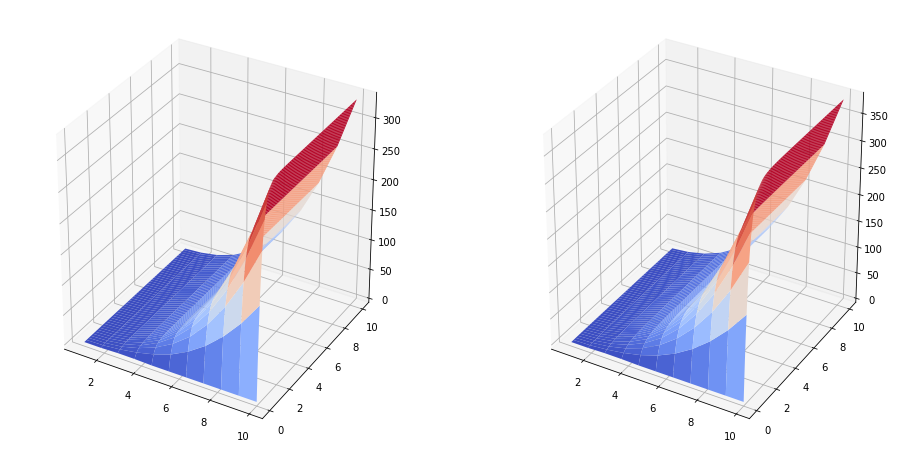

In [7]:
xx, tt = np.meshgrid(x, t)

f, axarr = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(projection='3d'))
axarr[0].plot_surface(xx, tt, u, cmap=cm.coolwarm, linewidth=0)
axarr[1].plot_surface(xx, tt, a, cmap=cm.coolwarm, linewidth=0)
f.subplots_adjust(hspace=1)
plt.show()